### PCA analysis

The video with detection box overlay is here: http://ml2dns.southcentralus.cloudapp.azure.com:8080/video/show?video_id=595613032

In [1]:
import numpy as np
import pandas as pd
import glob, os
import itertools
import matplotlib.image as mpimg
import cv2

import classifier

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
net_main_1, meta_main_1 = classifier.load_net("/data/yolo/model/yolo-obj.cfg", "/mnt/weights/backup.1719.strict/yolo-obj_4368.weights", "/data/yolo/model/obj.data.1719.strict")

#### `top_detections` returns the top 5 detections given an image

In [4]:
def top_detections(file_path, net_main_1, meta_main_1, take=5):
    return classifier.detect(net_main_1, meta_main_1, cv2.imread(file_path), thresh=0.0)[0:take]

#### For video `595613032`, load the "good" frames and "bad"' frames separately and get top 5 detections for each frame

In [5]:
file_list_bad = sorted(glob.glob('/data/yolo/mynotebooks/validation/bad/595613032-*.jpg'))
file_list_good = sorted(glob.glob('/data/yolo/mynotebooks/validation/good/595613032-*.jpg'))

In [28]:
detections_bad = [top_detections(f, net_main_1, meta_main_1, take=5) for f in file_list_bad]
detections_good = [top_detections(f, net_main_1, meta_main_1, take=5) for f in file_list_good]
arr_bad = np.array([ list(map(lambda x: x[1], d)) for d in detections_bad])
arr_good = np.array([ list(map(lambda x: x[1], d)) for d in detections_good])

#### Plot top 5 detections for all "good" frames along the time line

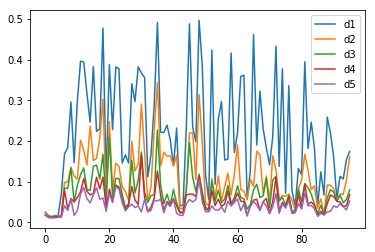

In [29]:
df = pd.DataFrame(data=arr_good, columns=['d1', 'd2', 'd3', 'd4', 'd5'])
df.plot()

#### Plot top 5 detections for all "bad" frames along the time line

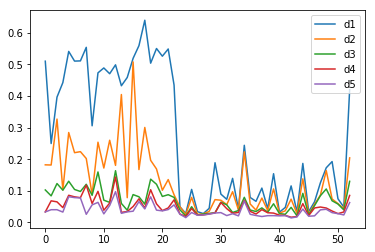

In [30]:
df = pd.DataFrame(data=arr_bad, columns=['d1', 'd2', 'd3', 'd4', 'd5'])
df.plot()

#### The rest is pretty much a standard PCA.  The plot of the PCAs doesn't seem to show clusters between "good" samples and "bad" samples.

Anything I did wrong?

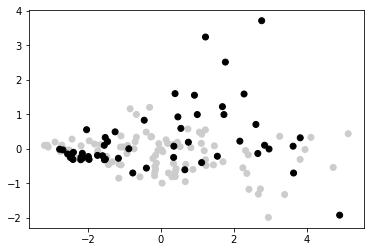

In [32]:
arr = np.vstack((arr_good, arr_bad))
df = pd.DataFrame(data=arr, columns=['d1', 'd2', 'd3', 'd4', 'd5'])

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

colors = np.hstack((np.repeat(0, arr_good.shape[0]), np.repeat(1, arr_bad.shape[0])))
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=colors, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))